In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 3)

In [20]:
w12 = pd.read_csv('weather_2012.csv')

In [22]:
w12.index = w12['Date/Time']

In [27]:
w12 = w12.drop(['Date/Time'], axis=1)

In [37]:
w12 = w12.dropna(axis=1, how='any')

In [108]:
march = w12[(w12.index >= '2012-03-01') & (w12.index <= '2012-03-31')]

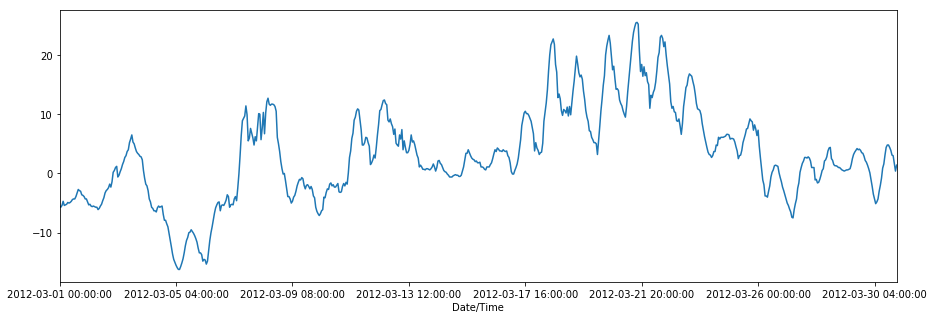

In [109]:
march["Temp (C)"].plot(figsize=(15, 5))

In [110]:
w12[:3]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [117]:
temps = march[['Temp (C)']].copy()

In [118]:
march.index = pd.to_datetime(march.index)

In [119]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2012-03-01 00:00:00 to 2012-03-30 23:00:00
Data columns (total 1 columns):
Temp (C)    720 non-null float64
dtypes: float64(1)
memory usage: 11.2 KB


In [120]:
march.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2012-03-01 00:00:00 to 2012-03-30 23:00:00
Data columns (total 7 columns):
Temp (C)              720 non-null float64
Dew Point Temp (C)    720 non-null float64
Rel Hum (%)           720 non-null int64
Wind Spd (km/h)       720 non-null int64
Visibility (km)       720 non-null float64
Stn Press (kPa)       720 non-null float64
Weather               720 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 65.0+ KB


In [122]:
temps.loc[:, 'Hour'] = march.index.hour

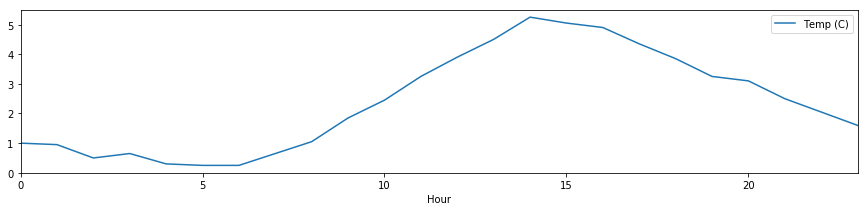

In [123]:
temps.groupby('Hour').aggregate(np.median).plot()